## 6.3 Batch Normalization
- 前節で見た通り、重みの初期値を適切に設定すれば、各層のアクティベーションの分布は適度な広がりを持ち、学習がスムーズに行える。
- 各層で適度な広がりを持つように、強制的にアクティベーションを調整する。

### 6.3.1 Batch Normalizationのアルゴリズム
- Batch Normalization(以降、Batch Normと表記）は、2015年発表された比較的新しい手法である。

#### 特徴
- 学習を早く進行させることができる(学習係数を大きくできる)
- 初期値にあまり依存しない
- 過学習を抑制できる(Dropoutなどを気にしなくて良い)

Batch Normは、ミニバッチごとに正規化を行う。データ分布の平均が0で、分散が1になるように正規化を行う。
$$
    \mu_B \leftarrow \frac{1}{m}\sum_{i=1}^{m} x_i \quad \text{(平均値)}\\
    \sigma^2_B \leftarrow \frac{1}{m}\sum_{i=1}^{m}(x_i - \mu_B)^2\quad \text{(分散)} \\
    \hat x_i \leftarrow \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
$$

- この処理を、$B=\{x_1,x_2\cdots,x_m\}$というm個の入力データからなるミニバッチに対して各層で行う。

- $\epsilon$は、ゼロ除算を防止するための小さな値(1e-7など)である。


さらに、Batch Normレイヤでは、正規化されたデータに対して固有のスケールとシフトで変換を行う
$$
    y_i = \gamma \hat x_i + \beta
$$
最初は$\gamma =1,\beta=0$であり。その後学習によって適した値に調整されていく。


この処理を活性化関数の前(あるいは後)に挿入する。

Batch Normの逆伝搬を計算するのために、$\frac{\partial y_i}{\partial x_i}$を求める必要がある。
$$
\frac{\partial y_i}{\partial x_i} = \frac{\partial}{\partial x_i}(\gamma \hat x_i + \beta)\\
= \gamma  \frac{\partial \hat x_i}{\partial x_i} \\
= \gamma  \frac{\partial}{\partial x_i} \frac{x_i - \mu}{\sqrt{\sigma_B^2 + \epsilon}}\\
= \gamma\left((\sigma_B^2 + \epsilon)^{-1/2}\frac{\partial}{\partial x_i}(x_i - \mu) + (x_i - \mu)\frac{\partial}{\partial x_i}(\sigma_B^2 + \epsilon)^{-1/2}\right)\\
(以下略)
$$

$\gamma,\beta$を学習させるために$\frac{\partial y_i}{\partial \gamma},\frac{\partial y_i}{\partial \beta}$を計算する必要もある。

### Batch Normalizationの評価
Batch Norm により、学習の進行が促進されていることがわかる
(図6-18)

<IPython.core.display.Javascript object>


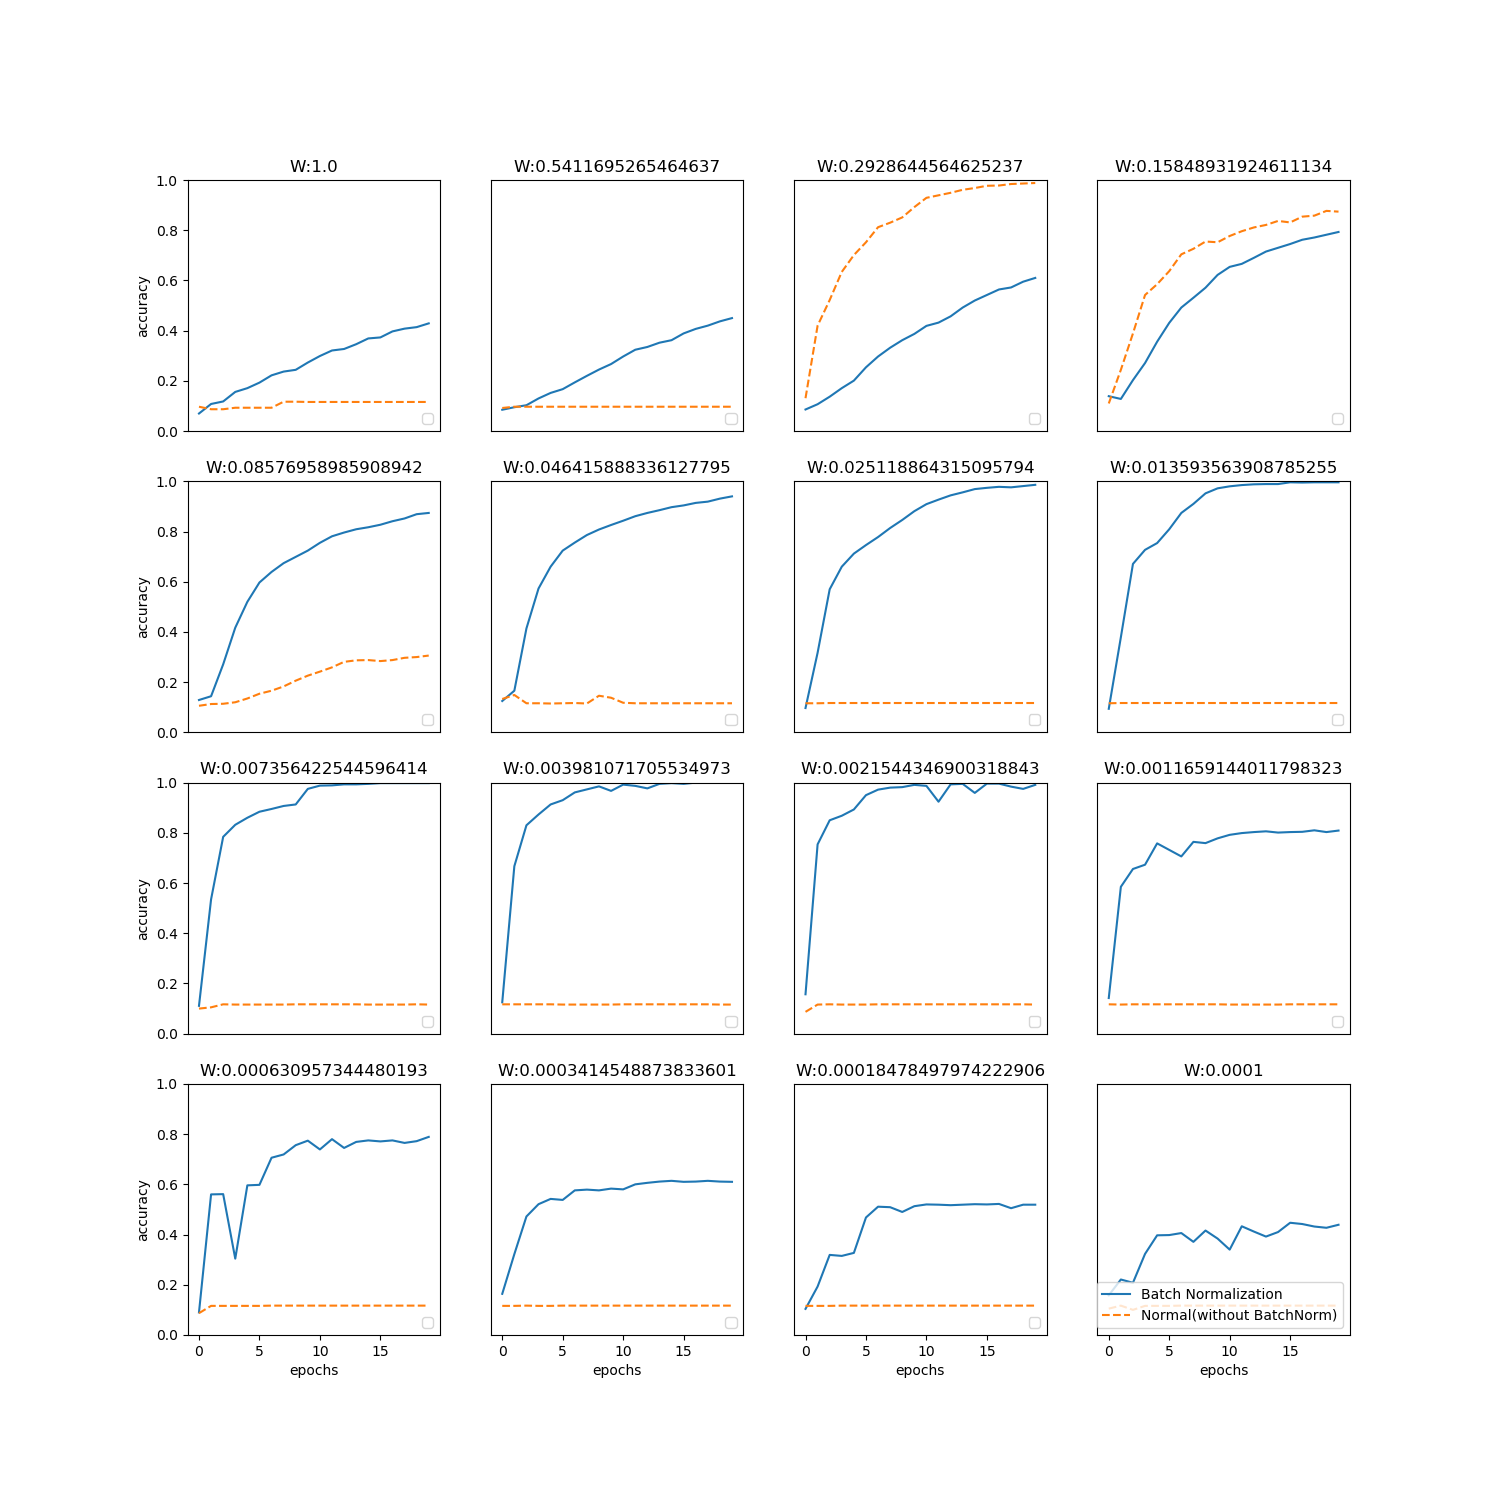

============== 1/16 ==============
epoch:0 | 0.097 - 0.07
epoch:1 | 0.087 - 0.108


../deep-learning-from-scratch/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../deep-learning-from-scratch/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.087 - 0.118
epoch:3 | 0.093 - 0.156
epoch:4 | 0.093 - 0.171
epoch:5 | 0.093 - 0.193
epoch:6 | 0.093 - 0.222
epoch:7 | 0.117 - 0.237
epoch:8 | 0.117 - 0.244
epoch:9 | 0.116 - 0.273
epoch:10 | 0.116 - 0.299
epoch:11 | 0.116 - 0.321
epoch:12 | 0.116 - 0.327
epoch:13 | 0.116 - 0.346
epoch:14 | 0.116 - 0.369
epoch:15 | 0.116 - 0.373
epoch:16 | 0.116 - 0.397
epoch:17 | 0.116 - 0.408


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.414
epoch:19 | 0.116 - 0.429
============== 2/16 ==============
epoch:0 | 0.092 - 0.085


../deep-learning-from-scratch/common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
/Users/xf9x/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:1 | 0.097 - 0.095
epoch:2 | 0.097 - 0.103
epoch:3 | 0.097 - 0.13
epoch:4 | 0.097 - 0.152
epoch:5 | 0.097 - 0.167
epoch:6 | 0.097 - 0.194
epoch:7 | 0.097 - 0.22
epoch:8 | 0.097 - 0.245
epoch:9 | 0.097 - 0.267
epoch:10 | 0.097 - 0.297
epoch:11 | 0.097 - 0.324
epoch:12 | 0.097 - 0.335
epoch:13 | 0.097 - 0.352
epoch:14 | 0.097 - 0.362
epoch:15 | 0.097 - 0.389
epoch:16 | 0.097 - 0.407
epoch:17 | 0.097 - 0.42


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.437
epoch:19 | 0.097 - 0.45
============== 3/16 ==============
epoch:0 | 0.131 - 0.086
epoch:1 | 0.42 - 0.107
epoch:2 | 0.522 - 0.137
epoch:3 | 0.634 - 0.171
epoch:4 | 0.701 - 0.201
epoch:5 | 0.752 - 0.254
epoch:6 | 0.812 - 0.297
epoch:7 | 0.83 - 0.332
epoch:8 | 0.851 - 0.362
epoch:9 | 0.892 - 0.387
epoch:10 | 0.929 - 0.419
epoch:11 | 0.939 - 0.432
epoch:12 | 0.949 - 0.457
epoch:13 | 0.961 - 0.492
epoch:14 | 0.968 - 0.52
epoch:15 | 0.977 - 0.542
epoch:16 | 0.978 - 0.564


No handles with labels found to put in legend.


epoch:17 | 0.984 - 0.572
epoch:18 | 0.986 - 0.595
epoch:19 | 0.988 - 0.61
============== 4/16 ==============
epoch:0 | 0.11 - 0.139
epoch:1 | 0.244 - 0.128
epoch:2 | 0.389 - 0.203
epoch:3 | 0.542 - 0.271
epoch:4 | 0.585 - 0.356
epoch:5 | 0.637 - 0.431
epoch:6 | 0.704 - 0.492
epoch:7 | 0.726 - 0.531
epoch:8 | 0.755 - 0.571
epoch:9 | 0.752 - 0.622
epoch:10 | 0.777 - 0.654
epoch:11 | 0.796 - 0.666
epoch:12 | 0.811 - 0.69
epoch:13 | 0.821 - 0.715
epoch:14 | 0.837 - 0.73
epoch:15 | 0.831 - 0.745
epoch:16 | 0.854 - 0.762
epoch:17 | 0.858 - 0.771


No handles with labels found to put in legend.


epoch:18 | 0.877 - 0.782
epoch:19 | 0.874 - 0.793
============== 5/16 ==============
epoch:0 | 0.106 - 0.129
epoch:1 | 0.113 - 0.144
epoch:2 | 0.114 - 0.271
epoch:3 | 0.12 - 0.417
epoch:4 | 0.135 - 0.52
epoch:5 | 0.154 - 0.597
epoch:6 | 0.166 - 0.639
epoch:7 | 0.183 - 0.674
epoch:8 | 0.206 - 0.699
epoch:9 | 0.226 - 0.724
epoch:10 | 0.242 - 0.755
epoch:11 | 0.259 - 0.781
epoch:12 | 0.281 - 0.796
epoch:13 | 0.287 - 0.809
epoch:14 | 0.288 - 0.817
epoch:15 | 0.284 - 0.827
epoch:16 | 0.288 - 0.841
epoch:17 | 0.297 - 0.852
epoch:18 | 0.3 - 0.869


No handles with labels found to put in legend.


epoch:19 | 0.306 - 0.874
============== 6/16 ==============
epoch:0 | 0.133 - 0.125
epoch:1 | 0.149 - 0.166
epoch:2 | 0.116 - 0.414
epoch:3 | 0.116 - 0.573
epoch:4 | 0.115 - 0.66
epoch:5 | 0.116 - 0.724
epoch:6 | 0.117 - 0.756
epoch:7 | 0.115 - 0.786
epoch:8 | 0.146 - 0.808
epoch:9 | 0.138 - 0.826
epoch:10 | 0.118 - 0.843
epoch:11 | 0.116 - 0.861
epoch:12 | 0.116 - 0.874
epoch:13 | 0.116 - 0.885
epoch:14 | 0.116 - 0.897
epoch:15 | 0.116 - 0.904
epoch:16 | 0.116 - 0.914


No handles with labels found to put in legend.


epoch:17 | 0.116 - 0.919
epoch:18 | 0.116 - 0.931
epoch:19 | 0.116 - 0.94
============== 7/16 ==============
epoch:0 | 0.116 - 0.097
epoch:1 | 0.116 - 0.317
epoch:2 | 0.117 - 0.57
epoch:3 | 0.117 - 0.66
epoch:4 | 0.117 - 0.712
epoch:5 | 0.117 - 0.746
epoch:6 | 0.117 - 0.778
epoch:7 | 0.117 - 0.814
epoch:8 | 0.117 - 0.846
epoch:9 | 0.117 - 0.881
epoch:10 | 0.117 - 0.909
epoch:11 | 0.117 - 0.927
epoch:12 | 0.117 - 0.944
epoch:13 | 0.117 - 0.956
epoch:14 | 0.117 - 0.969
epoch:15 | 0.117 - 0.974
epoch:16 | 0.117 - 0.978
epoch:17 | 0.117 - 0.976


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.981
epoch:19 | 0.117 - 0.986
============== 8/16 ==============
epoch:0 | 0.116 - 0.094
epoch:1 | 0.117 - 0.379
epoch:2 | 0.117 - 0.671
epoch:3 | 0.117 - 0.727
epoch:4 | 0.117 - 0.754
epoch:5 | 0.117 - 0.809
epoch:6 | 0.117 - 0.874
epoch:7 | 0.117 - 0.91
epoch:8 | 0.117 - 0.952
epoch:9 | 0.117 - 0.972
epoch:10 | 0.117 - 0.98
epoch:11 | 0.117 - 0.985
epoch:12 | 0.117 - 0.988
epoch:13 | 0.117 - 0.989
epoch:14 | 0.117 - 0.989
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.995
epoch:17 | 0.117 - 0.996
epoch:18 | 0.117 - 0.996


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.996
============== 9/16 ==============
epoch:0 | 0.1 - 0.111
epoch:1 | 0.105 - 0.535
epoch:2 | 0.117 - 0.784
epoch:3 | 0.116 - 0.832
epoch:4 | 0.116 - 0.86
epoch:5 | 0.116 - 0.884
epoch:6 | 0.116 - 0.895
epoch:7 | 0.116 - 0.907
epoch:8 | 0.117 - 0.913
epoch:9 | 0.117 - 0.975
epoch:10 | 0.117 - 0.988
epoch:11 | 0.117 - 0.989
epoch:12 | 0.117 - 0.993
epoch:13 | 0.117 - 0.993
epoch:14 | 0.116 - 0.995
epoch:15 | 0.116 - 0.998
epoch:16 | 0.116 - 0.998


No handles with labels found to put in legend.


epoch:17 | 0.116 - 0.998
epoch:18 | 0.117 - 0.998
epoch:19 | 0.116 - 0.998
============== 10/16 ==============
epoch:0 | 0.117 - 0.125
epoch:1 | 0.117 - 0.667
epoch:2 | 0.117 - 0.83
epoch:3 | 0.117 - 0.873
epoch:4 | 0.117 - 0.913
epoch:5 | 0.116 - 0.93
epoch:6 | 0.116 - 0.961
epoch:7 | 0.116 - 0.973
epoch:8 | 0.116 - 0.985
epoch:9 | 0.116 - 0.967
epoch:10 | 0.117 - 0.992
epoch:11 | 0.117 - 0.987
epoch:12 | 0.117 - 0.977
epoch:13 | 0.117 - 0.995
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 0.999
epoch:18 | 0.116 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.999
============== 11/16 ==============
epoch:0 | 0.087 - 0.157
epoch:1 | 0.116 - 0.754
epoch:2 | 0.117 - 0.85
epoch:3 | 0.116 - 0.868
epoch:4 | 0.116 - 0.893
epoch:5 | 0.116 - 0.95
epoch:6 | 0.117 - 0.972
epoch:7 | 0.117 - 0.98
epoch:8 | 0.117 - 0.982
epoch:9 | 0.117 - 0.991
epoch:10 | 0.117 - 0.987
epoch:11 | 0.117 - 0.924
epoch:12 | 0.117 - 0.993
epoch:13 | 0.117 - 0.995
epoch:14 | 0.117 - 0.959
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.996
epoch:17 | 0.117 - 0.984


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.975
epoch:19 | 0.116 - 0.991
============== 12/16 ==============
epoch:0 | 0.117 - 0.142
epoch:1 | 0.116 - 0.585
epoch:2 | 0.117 - 0.656
epoch:3 | 0.117 - 0.673
epoch:4 | 0.117 - 0.758
epoch:5 | 0.117 - 0.732
epoch:6 | 0.117 - 0.706
epoch:7 | 0.117 - 0.764
epoch:8 | 0.117 - 0.759
epoch:9 | 0.117 - 0.778
epoch:10 | 0.116 - 0.792
epoch:11 | 0.116 - 0.799
epoch:12 | 0.116 - 0.803
epoch:13 | 0.116 - 0.806
epoch:14 | 0.116 - 0.801
epoch:15 | 0.117 - 0.803
epoch:16 | 0.117 - 0.804
epoch:17 | 0.117 - 0.81
epoch:18 | 0.117 - 0.803


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.809
============== 13/16 ==============
epoch:0 | 0.087 - 0.09
epoch:1 | 0.116 - 0.56
epoch:2 | 0.116 - 0.561
epoch:3 | 0.116 - 0.304
epoch:4 | 0.116 - 0.596
epoch:5 | 0.116 - 0.598
epoch:6 | 0.117 - 0.706
epoch:7 | 0.117 - 0.719
epoch:8 | 0.117 - 0.756
epoch:9 | 0.117 - 0.774
epoch:10 | 0.117 - 0.739
epoch:11 | 0.117 - 0.78
epoch:12 | 0.117 - 0.745
epoch:13 | 0.117 - 0.769
epoch:14 | 0.117 - 0.775
epoch:15 | 0.117 - 0.771
epoch:16 | 0.117 - 0.775
epoch:17 | 0.117 - 0.765
epoch:18 | 0.117 - 0.772


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.789
============== 14/16 ==============
epoch:0 | 0.116 - 0.164
epoch:1 | 0.116 - 0.322
epoch:2 | 0.117 - 0.472
epoch:3 | 0.116 - 0.521
epoch:4 | 0.116 - 0.542
epoch:5 | 0.117 - 0.538
epoch:6 | 0.117 - 0.576
epoch:7 | 0.117 - 0.579
epoch:8 | 0.117 - 0.576
epoch:9 | 0.117 - 0.583
epoch:10 | 0.117 - 0.58
epoch:11 | 0.117 - 0.6
epoch:12 | 0.117 - 0.606
epoch:13 | 0.117 - 0.611
epoch:14 | 0.117 - 0.614
epoch:15 | 0.117 - 0.61
epoch:16 | 0.117 - 0.611


No handles with labels found to put in legend.


epoch:17 | 0.117 - 0.614
epoch:18 | 0.117 - 0.611
epoch:19 | 0.117 - 0.61
============== 15/16 ==============
epoch:0 | 0.116 - 0.104
epoch:1 | 0.116 - 0.193
epoch:2 | 0.116 - 0.319
epoch:3 | 0.117 - 0.315
epoch:4 | 0.117 - 0.327
epoch:5 | 0.117 - 0.468
epoch:6 | 0.117 - 0.511
epoch:7 | 0.117 - 0.509
epoch:8 | 0.117 - 0.49
epoch:9 | 0.117 - 0.513
epoch:10 | 0.117 - 0.52
epoch:11 | 0.117 - 0.519
epoch:12 | 0.117 - 0.517
epoch:13 | 0.117 - 0.519
epoch:14 | 0.117 - 0.521
epoch:15 | 0.117 - 0.52
epoch:16 | 0.117 - 0.522
epoch:17 | 0.117 - 0.505


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.519
epoch:19 | 0.117 - 0.519
============== 16/16 ==============
epoch:0 | 0.105 - 0.158
epoch:1 | 0.117 - 0.221
epoch:2 | 0.1 - 0.208
epoch:3 | 0.116 - 0.323
epoch:4 | 0.116 - 0.397
epoch:5 | 0.116 - 0.398
epoch:6 | 0.117 - 0.406
epoch:7 | 0.117 - 0.371
epoch:8 | 0.117 - 0.416
epoch:9 | 0.117 - 0.384
epoch:10 | 0.117 - 0.34
epoch:11 | 0.117 - 0.433
epoch:12 | 0.117 - 0.412
epoch:13 | 0.117 - 0.392
epoch:14 | 0.117 - 0.41
epoch:15 | 0.117 - 0.447
epoch:16 | 0.117 - 0.442
epoch:17 | 0.117 - 0.432
epoch:18 | 0.117 - 0.427
epoch:19 | 0.117 - 0.439


In [14]:
# coding: utf-8
%matplotlib notebook

import sys, os
sys.path.append('../deep-learning-from-scratch')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

fig = plt.figure(figsize=(15,15))

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    ax = fig.add_subplot(4,4,i+1)
    ax.set_title("W:" + str(w))
    if i == 15:
        ax.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        ax.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        ax.plot(x, bn_train_acc_list, markevery=2)
        ax.plot(x, train_acc_list, linestyle="--", markevery=2)

    ax.set_ylim(0, 1.0)
    if i % 4:
        ax.set_yticks([])
    else:
        ax.set_ylabel("accuracy")
    if i < 12:
        ax.set_xticks([])
    else:
        ax.set_xlabel("epochs")
    ax.legend(loc='lower right')
    
plt.show()